## <span style="color:pink;"><u><h4>QUESTION 1: </u></h4></span>

## <span style="color:black;"><h6>a)Load the dataset and display the first 5 rows to understand the structure.</h6></span>

## <span style="color:black;"><h6>b)Display summary statistics for numeric columns (mean, median, min, max, std) for Product_Price and Quantity.</h6></span>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [5]:
df=pd.read_csv("CAT 2 DATA.csv")
df.head(5)

,Order_ID,Customer_ID,Order_Date,Product_Category,Product_Price,Quantity,Payment_Method,Region
0,O0001,C039,1/1/2023,Electronics,43.45,3.0,Credit Card,North
1,O0002,C029,1/2/2023,Books,32.77,4.0,Paypal,South
2,O0003,C015,1/3/2023,Books,44.84,3.0,Credit Card,North
3,O0004,C043,1/4/2023,Books,NaN,1.0,Credit Card,North
4,O0005,C008,1/5/2023,Home Decor,23.01,1.0,Paypal,South


In [7]:
#b)	Display summary statistics for numeric columns (mean, median, min, max, std) for Product_Price and Quantity.

In [8]:
df['Product_Price'].agg(['mean','median','min', 'max', 'std'])

mean      49.615474
median    49.770000
min       -7.590000
max       95.470000
std       20.489004
Name: Product_Price, dtype: float64

In [9]:
df['Quantity'].agg(['mean','median','min', 'max', 'std'])

mean      4.810000
median    5.000000
min       1.000000
max       9.000000
std       2.557204
Name: Quantity, dtype: float64

## <span style="color:pink;"><u><h4>QUESTION 2: </u></h4></span>

## <span style="color:black;"><h6>a)Check for missing values in the dataset.</h6></span>

## <span style="color:black;"><h6>b)Provide a strategy to handle missing data for Product_Price and Region. Implement mean/median imputation for Product_Price and drop rows where Region is missing.</h6></span>

In [13]:
df=df.drop(100) #the row is fully empty hence inappropriate

In [14]:
df.isnull().sum()

Order_ID            0
Customer_ID         0
Order_Date          0
Product_Category    0
Product_Price       5
Quantity            0
Payment_Method      0
Region              5
dtype: int64

In [15]:
#Implement mean/median imputation for Product_Price 
# Fill missing values in the 'Product_Price' column with its mean
df.loc[:, 'Product_Price'] = df['Product_Price'].fillna(df['Product_Price'].mean())

In [16]:
# Drop the row where REGION is null
df=df.dropna(subset=["Region"])

In [17]:
df

,Order_ID,Customer_ID,Order_Date,Product_Category,Product_Price,Quantity,Payment_Method,Region
0,O0001,C039,1/1/2023,Electronics,43.450000,3.0,Credit Card,North
1,O0002,C029,1/2/2023,Books,32.770000,4.0,Paypal,South
2,O0003,C015,1/3/2023,Books,44.840000,3.0,Credit Card,North
3,O0004,C043,1/4/2023,Books,49.615474,1.0,Credit Card,North
4,O0005,C008,1/5/2023,Home Decor,23.010000,1.0,Paypal,South
5,O0006,C021,1/6/2023,Home Decor,29.620000,5.0,Credit Card,West
7,O0008,C019,1/8/2023,Electronics,25.010000,3.0,Credit Card,North
8,O0009,C023,1/9/2023,Books,88.900000,9.0,Paypal,South
9,O0010,C011,1/10/2023,Home Decor,46.930000,5.0,Paypal,North
10,O0011,C011,1/11/2023,Home Decor,31.860000,8.0,Paypal,East


In [18]:
df.shape

(95, 8)

## <span style="color:pink;"><h4>QUESTION 3: </h4></span>

## <span style="color:black;"><h6>a)Generate a bar chart showing the total quantity sold for each Product_Category</h6></span>

In [21]:
#GROUP BY is to help prevent duplication of the attributes
category_totals  = df.groupby("Product_Category")["Quantity"].sum()
category_totals

Product_Category
Books          115.0
Clothing       101.0
Electronics     94.0
Home Decor     143.0
Name: Quantity, dtype: float64

Text(0, 0.5, 'Total quantity sold')

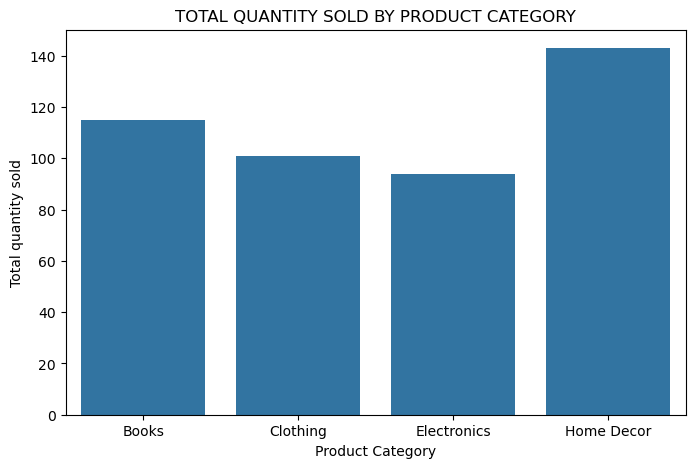

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(x=category_totals.index, y=category_totals.values)
plt.title("TOTAL QUANTITY SOLD BY PRODUCT CATEGORY")
plt.xlabel("Product Category")
plt.ylabel("Total quantity sold")

## <span style="color:black;"><h7> b)	Which product category has the highest sales quantity?</h7></span> 
## <span style="color:blue;"><h6> as per the bar chat Home decor has the highest sales quantity which is 143.0</h6></span>

## <span style="color:pink;"><h7> question 4</h7></span> 
## <span style="color:black;"><h6>a)	Create a boxplot to visualize the distribution of Product_Price across different Product_Category</h6></span>

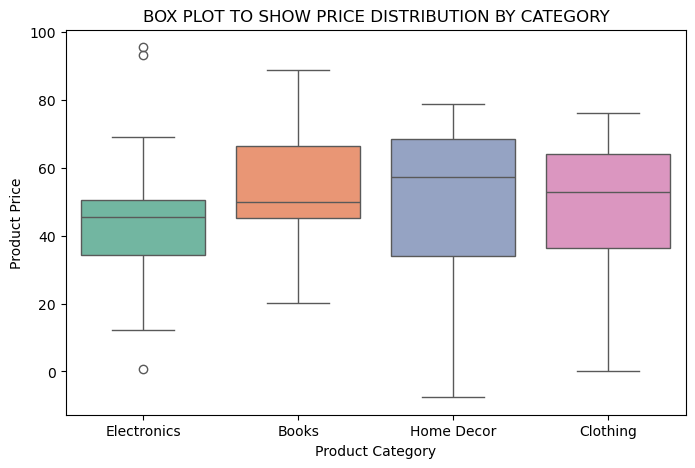

In [25]:
# Create the boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Product_Category', y='Product_Price', hue='Product_Category', data=df, palette='Set2')
plt.title('BOX PLOT TO SHOW PRICE DISTRIBUTION BY CATEGORY')
plt.xlabel('Product Category')
plt.ylabel('Product Price')
plt.show()

## <span style="color:black;"><h6> b) From the boxplot, which category has the most expensive products on average?</h6></span>
## <span style="color:blue;"><h6>Based on the median value, Home Decor is the category with the most expensive products on average. This conclusion is reinforced by its high median price and larger spread compared to the other categories. While some categories (like Books and Clothing) have a wide range of prices, their median values are lower than that of Home Decor.</h6></span>

## <span style="color:pink;"><h4>QUESTION 5A: </h4></span>
## <span style="color:black;"><h4>Analyze the relationship between Order_Date and Quantity. Create a time series plot of total quantity sold per month.</h4></span>

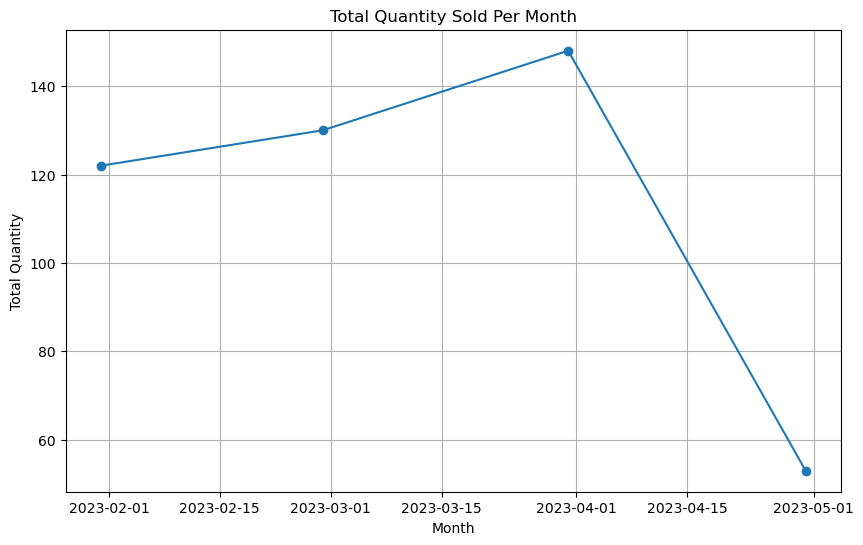

In [29]:
# Alternative: Resample by month
monthly_sales = df.resample('ME', on='Order_Date')['Quantity'].sum()

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.title('Total Quantity Sold Per Month')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.grid(True)
plt.show()

## <span style="color:pink;"><u><h4>QUESTION 5B: </u></h4></span>

## <span style="color:black;"><h6>:Describe the seasonal trends or patterns you observe in the data? </h6></span>
## <span style="color:blue;"><h6>from the start of february to the start of march a moderate rise in the total quantity sold is seen , then from the start of march to almost april there is a more impulsive rise in the total quantitysold. But the rising curve changes drastically and begins to move down-wards impulsively from start of april to the start of may hence showing a very huge decline in total quantity sold.  </h6></span>

## <span style="color:pink;"><h4>QUESTION 5C(i):</h4></span>
## <span style="color:black;"><h4>correlation heatmap for numeric variables</h4></span>

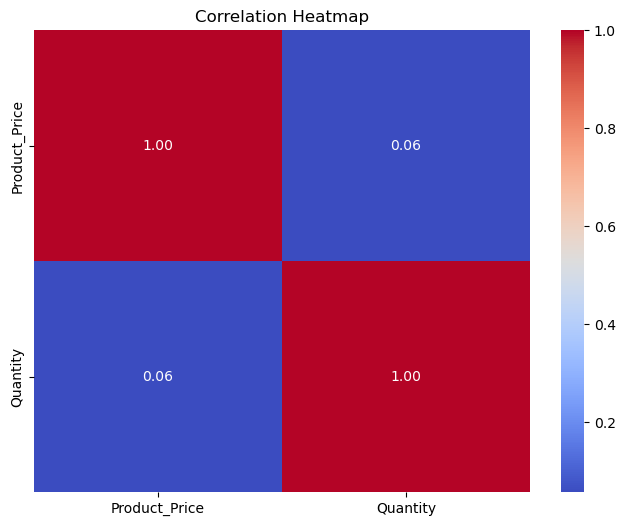

In [33]:
# b) Correlation heatmap
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show() 

## <span style="color:pink;"><h4>QUESTION 5C(i):</h4></span>
## <span style="color:black;"><h4>correlation matrix plot for numeric variables</h4></span>

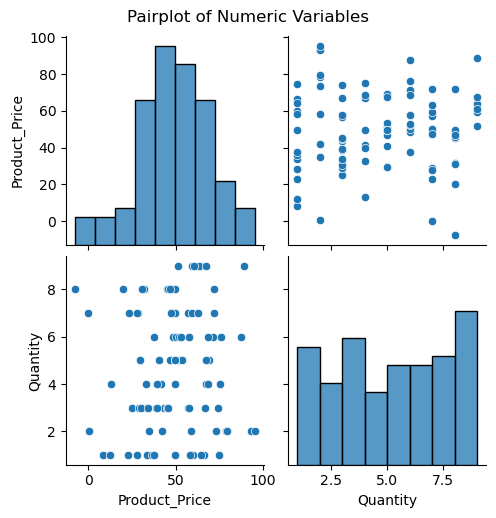

In [35]:
#Correlation matrix plot (Seaborn)
sns.pairplot(df)
plt.suptitle('Pairplot of Numeric Variables', y=1.02)
plt.show()

## <span style="color:black;"><h4>Interpret any strong positive or negative correlations found?</h4></span>